In [177]:
import requests
response = requests.get("https://api.bitfinex.com/v1/symbols")
symbols_bitfinex = response.json()


In [1]:
import requests
import datetime 
import pandas as pd 


def build_data(symbol,frequency):
    
    response = requests.get("https://api.bitfinex.com/v2/candles/trade:{}:t{}/hist?limit=1000".format(frequency,symbol))
    tickers = response.json()
    tickers

    ticker_data = []
    for item in tickers:
        timestamp = item[0]/1000
        date = datetime.datetime.fromtimestamp(timestamp=timestamp).strftime("%Y-%m-%d %H:%M:%S")
        open_ = item[1]                                                     
        high = item[3]
        low = item[4]
        close= item[2]
        volume = item[5]
        ticker_data.append((date,close,volume,symbol))
        
    #data = pd.DataFrame(ticker_data,columns=["Date","Price","Volume"])
    return ticker_data

symbols = ["XRPBTC","ZECBTC", "QTMBTC","GNTBTC","NEOBTC","XMRBTC","ETHBTC","EOSBTC","DSHBTC"]

#while time.time() < 
data = []
for symbol in symbols:
    info = build_data(symbol,"30m")
    data = data + info
    
all_tickers = pd.DataFrame(data,columns=["date","close","volume","symbol"])
all_tickers.tail()    

,date,close,volume,symbol
8873,2017-12-25 05:30:00,0.082020,272.119686,DSHBTC
8874,2017-12-25 05:00:00,0.083130,159.380772,DSHBTC
8875,2017-12-25 04:30:00,0.083899,163.948841,DSHBTC
8876,2017-12-25 04:00:00,0.083862,97.305067,DSHBTC
8877,2017-12-25 03:30:00,0.083640,156.529244,DSHBTC


In [2]:
all_tickers = all_tickers.set_index(["symbol","date"])


In [3]:
all_tickers = all_tickers.sort_index(axis=0)
all_tickers.tail(10)

close      volume
symbol date                                     
ZECBTC 2018-01-14 19:00:00  0.048751  223.601075
       2018-01-14 19:30:00  0.048940  340.414316
       2018-01-14 20:00:00  0.048989  414.085781
       2018-01-14 20:30:00  0.048821   62.392788
       2018-01-14 21:00:00  0.048942  106.546038
       2018-01-14 21:30:00  0.048613  137.987693
       2018-01-14 22:00:00  0.048890   51.464170
       2018-01-14 22:30:00  0.048981  196.962943
       2018-01-14 23:00:00  0.049011  154.081661
       2018-01-14 23:30:00  0.049019    0.319515

In [4]:
all_tickers.isnull().sum()

close     0
volume    0
dtype: int64

In [5]:
all_tickers = all_tickers.unstack(level=0).swaplevel(0,1,1).sort_index(1)


In [6]:
all_tickers.head(20)

symbol                 DSHBTC                EOSBTC                  ETHBTC  \
                        close      volume     close        volume     close   
date                                                                          
2017-12-25 03:30:00  0.083640  156.529244       NaN           NaN       NaN   
2017-12-25 04:00:00  0.083862   97.305067  0.000604   4901.669400  0.052121   
2017-12-25 04:30:00  0.083899  163.948841  0.000604  20771.130292  0.052365   
2017-12-25 05:00:00  0.083130  159.380772  0.000600  25434.000799  0.052028   
2017-12-25 05:30:00  0.082020  272.119686  0.000603  11631.800407  0.051670   
2017-12-25 06:00:00  0.082010   68.186024  0.000601   7384.762855  0.051619   
2017-12-25 06:30:00  0.082367   35.724608  0.000601  10861.599854  0.051883   
2017-12-25 07:00:00  0.082269   34.841045  0.000603  11535.826664  0.051610   
2017-12-25 07:30:00  0.082191   38.528715  0.000601   7886.358611  0.051416   
2017-12-25 08:00:00  0.082000   94.477765  0.000602   8738.116681  0.051523   
2017-12-25 08:30:00  0.082070   63.238946  0.000599  39496.439073  0.051291   
2017-12-25 09:00:00  0.082074   84.379944  0.000599  10363.475803  0.051369   
2017-12-25 09:30:00  0.082342  136.782950  0.000607  10460.983337  0.051401   
2017-12-25 10:00:00  0.082245  105.005257  0.000616  52781.059143  0.051627   
2017-12-25 10:30:00  0.082906   52.201508  0.000607  50968.888515  0.051975   
2017-12-25 11:00:00  0.083270   21.699645  0.000610  29351.329126  0.052012   
2017-12-25 11:30:00  0.082885   71.275924  0.000602  11472.129017  0.052023   
2017-12-25 12:00:00  0.082741   92.845497  0.000602  27833.930372  0.052173   
2017-12-25 12:30:00  0.082319   56.659352  0.000604  13249.071337  0.052002   
2017-12-25 13:00:00  0.082271   75.808415  0.000603  43236.108473  0.051987   

symbol                           GNTBTC           NEOBTC               \
                          volume  close volume     close       volume   
date                                                                    
2017-12-25 03:30:00          NaN    NaN    NaN       NaN          NaN   
2017-12-25 04:00:00  2218.813571    NaN    NaN  0.004451   941.889584   
2017-12-25 04:30:00  2507.018069    NaN    NaN  0.004444   209.269738   
2017-12-25 05:00:00  2619.745149    NaN    NaN  0.004390  1826.299306   
2017-12-25 05:30:00  2699.507496    NaN    NaN  0.004377   969.905211   
2017-12-25 06:00:00  1352.913179    NaN    NaN  0.004401   493.420760   
2017-12-25 06:30:00   521.447224    NaN    NaN  0.004392   324.385214   
2017-12-25 07:00:00  1424.593223    NaN    NaN  0.004414  1116.895988   
2017-12-25 07:30:00  1118.851824    NaN    NaN  0.004355  2312.879562   
2017-12-25 08:00:00   896.918358    NaN    NaN  0.004393   620.372763   
2017-12-25 08:30:00  1258.256157    NaN    NaN  0.004419   815.091164   
2017-12-25 09:00:00  1284.583848    NaN    NaN  0.004423  1990.821703   
2017-12-25 09:30:00  1512.921947    NaN    NaN  0.004421  1065.285900   
2017-12-25 10:00:00  2053.554674    NaN    NaN  0.004446   801.101626   
2017-12-25 10:30:00  2089.740690    NaN    NaN  0.004475  1314.520000   
2017-12-25 11:00:00  2439.437048    NaN    NaN  0.004460   304.198292   
2017-12-25 11:30:00   636.146431    NaN    NaN  0.004441  1046.258142   
2017-12-25 12:00:00  1471.703855    NaN    NaN  0.004427  1714.204770   
2017-12-25 12:30:00  2778.311437    NaN    NaN  0.004371  1664.534419   
2017-12-25 13:00:00  1599.628453    NaN    NaN  0.004416  2273.062942   

symbol                 QTMBTC                 XMRBTC                XRPBTC  \
                        close       volume     close      volume     close   
date                                                                         
2017-12-25 03:30:00  0.003171   856.187825  0.024521  254.952710       NaN   
2017-12-25 04:00:00  0.003190   597.088569  0.024610  528.068016  0.000071   
2017-12-25 04:30:00  0.003172    87.108520  0.024717   59.360330  0.000072   
2017-12-25 05:00:00  0.003193   38

In [7]:
all_tickers.describe()

symbol       DSHBTC                    EOSBTC                     ETHBTC  \
              close       volume        close        volume        close   
count   1000.000000  1000.000000  1000.000000  1.000000e+03  1000.000000   
mean       0.074785   148.416176     0.000667  4.103162e+04     0.066698   
std        0.003059   137.783222     0.000172  5.447086e+04     0.016617   
min        0.062862    10.103795     0.000516  1.091673e+02     0.046368   
25%        0.073414    70.029522     0.000565  1.394898e+04     0.052720   
50%        0.074816   110.245682     0.000597  2.638322e+04     0.060880   
75%        0.076043   174.064465     0.000652  4.953389e+04     0.081938   
max        0.083899  1597.041802     0.001285  1.012451e+06     0.099957   

symbol                    GNTBTC                      NEOBTC                \
              volume       close         volume        close        volume   
count    1000.000000  878.000000     878.000000  1000.000000   1000.000000   
mean     1913.808659    0.000065   42404.970028     0.006472   2864.468464   
std      1725.699994    0.000007   60777.816473     0.001780   2829.654486   
min         1.599500    0.000048      57.884000     0.003862     23.883004   
25%       976.056864    0.000060   11906.728090     0.005058   1018.713750   
50%      1480.318228    0.000065   24878.127943     0.006225   1916.045201   
75%      2247.087335    0.000071   48431.047911     0.008108   3890.179545   
max     25150.424095    0.000088  806709.592865     0.011807  22219.135540   

symbol       QTMBTC                     XMRBTC                    XRPBTC  \
              close        volume        close       volume        close   
count   1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean       0.003525   1692.685952     0.025385   491.036845     0.000137   
std        0.000297   2458.292841     0.002019   652.683240     0.000036   
min        0.002702      5.515564     0.020630    13.763299     0.000062   
25%        0.003307    458.098660     0.024169   177.725326     0.000129   
50%        0.003565    983.973826     0.024750   325.230032     0.000145   
75%        0.003766   1918.192087     0.026934   534.551911     0.000159   
max        0.004589  37971.032081     0.030309  9810.656171     0.000229   

symbol                     ZECBTC               
              volume        close       volume  
count   1.000000e+03  1000.000000  1000.000000  
mean    8.257147e+05     0.040166   308.835070  
std     9.431254e+05     0.006011   401.431815  
min     5.780405e+03     0.031002     0.319515  
25%     2.412610e+05     0.035035    99.034828  
50%     4.767445e+05     0.037566   184.258352  
75%     1.063681e+06     0.046456   366.935757  
max     9.149821e+06     0.051999  4308.933636

In [8]:
# Observe the correlation between percent change of price and percent change in volume 
tickers_pct_change = all_tickers.pct_change().dropna()
tickers_pct_change.tail(10)

symbol                 DSHBTC              EOSBTC              ETHBTC  \
                        close    volume     close    volume     close   
date                                                                    
2018-01-14 18:30:00 -0.001880  1.412713  0.017861 -0.043436  0.003412   
2018-01-14 19:00:00  0.009066 -0.001402 -0.002721  0.563550  0.002448   
2018-01-14 19:30:00 -0.002133 -0.524340 -0.011103 -0.773276 -0.002483   
2018-01-14 20:00:00 -0.005624  1.586808  0.011703  0.690499  0.006801   
2018-01-14 20:30:00 -0.002902 -0.663224 -0.008558  0.549632  0.004253   
2018-01-14 21:00:00 -0.000162  0.211096 -0.019636  0.386719 -0.001347   
2018-01-14 21:30:00 -0.002857  0.912962 -0.017320  1.180440 -0.003875   
2018-01-14 22:00:00  0.001068  0.003455 -0.008566 -0.565898 -0.001670   
2018-01-14 22:30:00 -0.001066 -0.159953 -0.005462 -0.168716  0.004264   
2018-01-14 23:00:00  0.008905 -0.235677  0.018175  0.234864  0.001209   

symbol                           GNTBTC               NEOBTC            \
                       volume     close     volume     close    volume   
date                                                                     
2018-01-14 18:30:00 -0.334955  0.018983  -0.734890  0.000915 -0.546975   
2018-01-14 19:00:00  0.525213 -0.008413  -0.282089  0.016813 -0.199049   
2018-01-14 19:30:00 -0.403807  0.009091   0.306943 -0.015816 -0.410297   
2018-01-14 20:00:00  0.241443  0.011111  -0.441589  0.029949  0.810015   
2018-01-14 20:30:00 -0.366189 -0.005792   0.237125  0.014362 -0.126980   
2018-01-14 21:00:00  0.717882 -0.002539   0.469296  0.011012  0.766749   
2018-01-14 21:30:00  0.010237  0.002845  -0.128548  0.013918 -0.335779   
2018-01-14 22:00:00  0.202457 -0.000448  -0.689686  0.004178 -0.133956   
2018-01-14 22:30:00 -0.097398  0.004631  16.922287  0.002462  0.899866   
2018-01-14 23:00:00 -0.416434 -0.011152  -0.885209 -0.009062 -0.379043   

symbol                 QTMBTC              XMRBTC              XRPBTC  \
                        close    volume     close    volume     close   
date                                                                    
2018-01-14 18:30:00  0.012746 -0.572792  0.004344 -0.556177  0.004461   
2018-01-14 19:00:00 -0.000188  0.076083  0.003321 -0.183730  0.007624   
2018-01-14 19:30:00  0.005797 -0.184002  0.006276 -0.602167 -0.004334   
2018-01-14 20:00:00  0.005230  3.539568  0.003872  7.580515 -0.001623   
2018-01-14 20:30:00  0.000743 -0.112266  0.002594 -0.630549 -0.000887   
2018-01-14 21:00:00  0.009815  0.644203 -0.004937 -0.544442  0.001257   
2018-01-14 21:30:00  0.041794  2.715148 -0.002601  0.900385 -0.008643   
2018-01-14 22:00:00  0.006026 -0.563153 -0.004185  4.241606 -0.005589   
2018-01-14 22:30:00  0.014462  1.920431 -0.000207 -0.877092 -0.004571   
2018-01-14 23:00:00 -0.060754 -0.281415 -0.001654  0.826006  0.024390   

symbol                           ZECBTC            
                       volume     close    volume  
date                                               
2018-01-14 18:30:00  0.096451 -0.001105 -0.407704  
2018-01-14 19:00:00  0.130791 -0.000943  0.157153  
2018-01-14 19:30:00 -0.517307  0.003877  0.522418  
2018-01-14 20:00:00  0.054989  0.001001  0.216417  
2018-01-14 20:30:00  0.942877 -0.003429 -0.849324  
2018-01-14 21:00:00 -0.403065  0.002478  0.707666  
2018-01-14 21:30:00  0.636649 -0.006722  0.295099  
2018-01-14 22:00:00 -0.205495  0.005698 -0.627038  
2018-01-14 22:30:00  1.123628  0.001861  2.827186  
2018-01-14 23:00:00  0.489352  0.000612 -0.217712

In [9]:
#tickers_pct_change.xs(level=0,axis=1)
symbols = tickers_pct_change.columns.levels[0]
#df.xs('one', level='second', axis=1)
symbols[0]

'DSHBTC'

In [10]:
tickers_pct_change.loc[:,"ETHBTC"]["close"]
tickers_pct_change.corr()

symbol           DSHBTC              EOSBTC              ETHBTC            \
                  close    volume     close    volume     close    volume   
symbol                                                                      
DSHBTC close   1.000000  0.045197  0.109770 -0.068842  0.342637 -0.009044   
       volume  0.045197  1.000000 -0.040944  0.062117  0.050891  0.122092   
EOSBTC close   0.109770 -0.040944  1.000000 -0.061045  0.347996 -0.098294   
       volume -0.068842  0.062117 -0.061045  1.000000 -0.023492  0.125116   
ETHBTC close   0.342637  0.050891  0.347996 -0.023492  1.000000 -0.055372   
       volume -0.009044  0.122092 -0.098294  0.125116 -0.055372  1.000000   
GNTBTC close   0.131056 -0.038741  0.191862 -0.068832  0.267498 -0.090768   
       volume  0.075344  0.003976 -0.055582 -0.001489 -0.035134 -0.007626   
NEOBTC close   0.203392 -0.022325  0.232740 -0.038834  0.425577 -0.091460   
       volume -0.010559  0.020224 -0.077637  0.093187 -0.044234  0.106592   
QTMBTC close   0.114445 -0.018396  0.170069 -0.024387  0.244358 -0.087039   
       volume  0.003951  0.047625 -0.000213  0.013596 -0.013745  0.054099   
XMRBTC close   0.363690 -0.014480  0.140091 -0.046852  0.296490 -0.049778   
       volume  0.023990  0.031162 -0.053842  0.028006 -0.021889  0.050087   
XRPBTC close   0.064198  0.073442  0.088572  0.016904  0.189613 -0.036893   
       volume -0.004301  0.105341 -0.083385  0.038515 -0.104882  0.165943   
ZECBTC close   0.292595 -0.033233  0.163930  0.003358  0.292861 -0.038183   
       volume  0.052330  0.098675  0.001596  0.079277  0.031058  0.098498   

symbol           GNTBTC              NEOBTC              QTMBTC            \
                  close    volume     close    volume     close    volume   
symbol                                                                      
DSHBTC close   0.131056  0.075344  0.203392 -0.010559  0.114445  0.003951   
       volume -0.038741  0.003976 -0.022325  0.020224 -0.018396  0.047625   
EOSBTC close   0.191862 -0.055582  0.232740 -0.077637  0.170069 -0.000213   
       volume -0.068832 -0.001489 -0.038834  0.093187 -0.024387  0.013596   
ETHBTC close   0.267498 -0.035134  0.425577 -0.044234  0.244358 -0.013745   
       volume -0.090768 -0.007626 -0.091460  0.106592 -0.087039  0.054099   
GNTBTC close   1.000000 -0.038734  0.227347 -0.049783  0.164659 -0.020085   
       volume -0.038734  1.000000 -0.014838 -0.014116  0.016242  0.007143   
NEOBTC close   0.227347 -0.014838  1.000000  0.001099  0.319041  0.001667   
       volume -0.049783 -0.014116  0.001099  1.000000 -0.042746 -0.000759   
QTMBTC close   0.164659  0.016242  0.319041 -0.042746  1.000000  0.097408   
       volume -0.020085  0.007143  0.001667 -0.000759  0.097408  1.000000   
XMRBTC close   0.187248  0.068910  0.303998 -0.064504  0.190943 -0.000811   
       volume -0.071199  0.000306 -0.016044  0.013843 -0.030361 -0.002098   
XRPBTC close   0.171845 -0.005709  0.213117  0.018107  0.139245 -0.042323   
       volume -0.077767  0.002522 -0.097058  0.166914 -0.140588  0.022921   
ZECBTC close   0.160655 -0.019463  0.254142 -0.014858  0.179544  0.017327   
       volume -0.028563 -0.004780 -0.022849  0.076875 -0.050533  0.035389   

symbol           XMRBTC              XRPBTC              ZECBTC            
                  close    volume     close    volume     close    volume  
symbol                                                                     
DSHBTC close   0.363690  0.023990  0.064198 -0.004301  0.292595  0.052330  
       volume -0.014480  0.031162  0.073442  0.105341 -0.033233  0.098675  
EOSBTC close   0.140091 -0.053842  0.088572 -0.083385  0.163930  0.001596  
       volume -0.046852  0.028006  0.016904  0.038515  0.003358  0.079277  
ETHBTC close   0.296490 -0.021889  0.189613 -0.104882  0.292861  0.031058  
       volume -0.049778  0.050087 -0.036893  0.165943 -0.038183  0.098498  
GNTBTC close   0.187248 -0.071199  0.171845 -0.077767  0.160655 -0.028563  
    

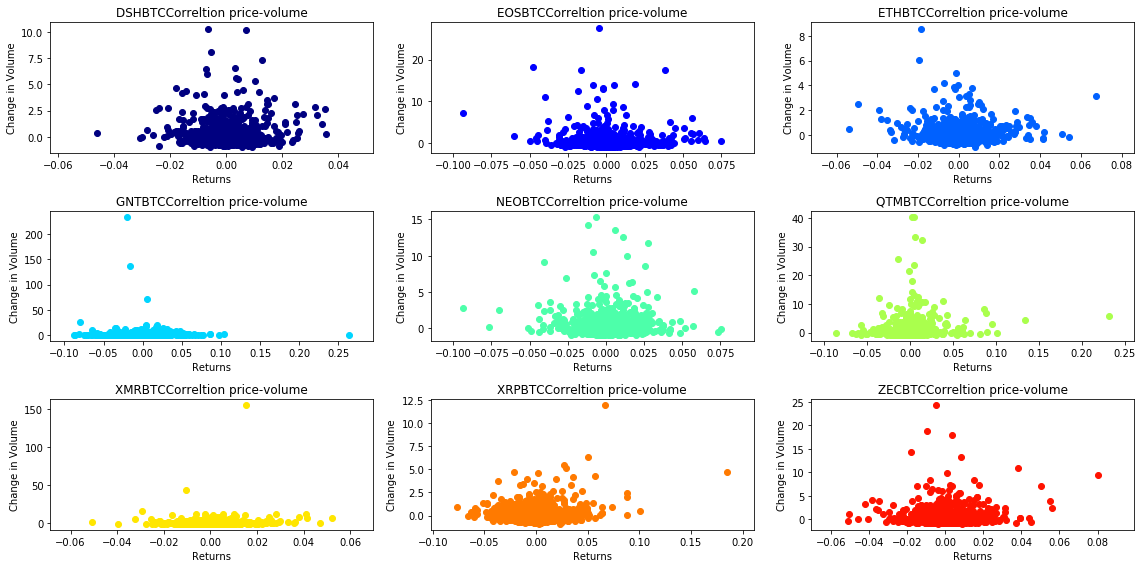

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import linregress

jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
def correlation(df,symbols, n_rows, n_cols):
    fig = plt.figure(figsize=(16,8))
    #fig = plt.figure(figsize=(14,9))
    for i, symbol in enumerate(symbols):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,symbol]
        ax.scatter(asset["close"], asset["volume"], c = next(colors))
        ax.set_xlabel("Returns")
        ax.set_ylabel("Change in Volume")
        ax.set_title(symbol +"Correltion price-volume")
    fig.tight_layout() 
    plt.show()
        
symbols = tickers_pct_change.columns.levels[0]  

correlation(tickers_pct_change,symbols,3,3)

In the graphs above, it looks like that in some coins there are a positive relation between change in the returns and change in volume. This relation can be observed in the coins ZECBTC, NEOBTC, and XRPBTC. On the other hand, in coins sucha as QTMBTCC, XRMBTC,ETHBTC and GNTBTC, there's not any signal about a relation neither positive or negative.

In the next step I would calculate the R Squared between returns and change in volume over all of the assets, then set a regression line for the coin with the highest value.  

In [13]:
import scipy
def R_value(df,symbols):
    r_squared = [] 
    for symbol in symbols:
        asset = df.loc[:,symbol]
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(asset["close"], asset["volume"])
        r_squared.append((symbol,r_value))
    
    return r_squared
R_value(tickers_pct_change,symbols)

[('DSHBTC', 0.045197463026999604),
 ('EOSBTC', -0.061044954884300937),
 ('ETHBTC', -0.055371896000723682),
 ('GNTBTC', -0.038733582016879958),
 ('NEOBTC', 0.0010985210248897082),
 ('QTMBTC', 0.097407894264585709),
 ('XMRBTC', 0.070300248070064061),
 ('XRPBTC', 0.14892433998126672),
 ('ZECBTC', 0.073047864054428979)]

It seems that the relation between change in volume to change in price is not strong for any of the pairs, in the time frame of 30 minutes. If we increased the time frame to 1 day, the relation become much more stronger for all the pairs. In the 30 minutes timeframe, the XRPBTC has a R Squared of 0.148, but in this case is affected by two outliers points, that we can observe in the graph. 

Likewise for the pairs EOSBTC, ETHBTC, and GNTBTC, the relation between change in price and change in volume is negative in the 30 minutes timeframe. The main conclusion that I get is that the relation between those two variables is high sensitive to the time frame, showed that when the time frame is increased, the relation is more strong. 

In [14]:
stack_tickers = tickers_pct_change.stack(level=0).swaplevel(0,1,0).sort_index(0)

In [15]:
stack_tickers.isnull().sum()


close     0
volume    0
dtype: int64

In [16]:
# In this step I would carry on an analysis between retruns and change in volume,  in one and two previous periods. First I would create the variable 
# one_lag_volume and two_lag_volume
stack_tickers["one_lag_volume"] = stack_tickers["volume"].shift(1)
stack_tickers["two_lag_volume"] = stack_tickers["volume"].shift(2)
stack_tickers.head(10)

close    volume  one_lag_volume  two_lag_volume
symbol date                                                                   
DSHBTC 2017-12-27 17:30:00  0.005530 -0.473797             NaN             NaN
       2017-12-27 18:00:00  0.009272  0.373014       -0.473797             NaN
       2017-12-27 18:30:00 -0.010358 -0.460373        0.373014       -0.473797
       2017-12-27 19:00:00 -0.000279  0.571003       -0.460373        0.373014
       2017-12-27 19:30:00  0.000133 -0.475520        0.571003       -0.460373
       2017-12-27 20:00:00  0.006385 -0.132392       -0.475520        0.571003
       2017-12-27 20:30:00 -0.005551  0.239415       -0.132392       -0.475520
       2017-12-27 21:00:00 -0.002552 -0.440594        0.239415       -0.132392
       2017-12-27 21:30:00  0.003758  0.807971       -0.440594        0.239415
       2017-12-27 22:00:00 -0.016076  0.541593        0.807971       -0.440594

In [20]:
import statsmodels.api as sm

def regression(df,symbols,predictor):
    models = []
    for symbol in symbols:
        X = df.loc[symbol,predictor]
        X = sm.add_constant(X)
        y = df.loc[symbol,"close"]
        model = sm.OLS(y,X,missing='drop')
        results = model.fit()
        
        if results.pvalues[1] > 0.05:
            continue
        else:
            res = {'Symbol' : symbol,
               'Variable': predictor ,
               'Intercept': results.params[0],
               'Coefficient': results.params[1],
               'PValue': results.pvalues[1],
               'AdjRSquared': results.rsquared_adj}
        models.append(res)        
    return models


volume = regression(stack_tickers,symbols,"volume")
volume_one_lag = regression(stack_tickers,symbols,"one_lag_volume")
volume_two_lag = regression(stack_tickers,symbols,"two_lag_volume")


In [21]:
print("Relation among returns and current volume:", volume)
print("Relation among returns and one lag volume:", volume_one_lag)
print("Relation among returns and two lag volume:",volume_two_lag)

Relation among returns and current volume: [{'Symbol': 'QTMBTC', 'Variable': 'volume', 'Intercept': -0.00010071082215893306, 'Coefficient': 0.00055586388429018641, 'PValue': 0.0039047136082120642, 'AdjRSquared': 0.0083549892813820081}, {'Symbol': 'XMRBTC', 'Variable': 'volume', 'Intercept': 0.00018718304977517367, 'Coefficient': 0.00012025932129794654, 'PValue': 0.037497970963793995, 'AdjRSquared': 0.0038036147241112817}, {'Symbol': 'XRPBTC', 'Variable': 'volume', 'Intercept': 0.00016134111955790791, 'Coefficient': 0.0034023967801844316, 'PValue': 9.5921551812497987e-06, 'AdjRSquared': 0.021059670090387783}, {'Symbol': 'ZECBTC', 'Variable': 'volume', 'Intercept': 0.00022862756225349693, 'Coefficient': 0.00043391875989320217, 'PValue': 0.030631985395916758, 'AdjRSquared': 0.0041979309354119865}]
Relation among returns and one lag volume: [{'Symbol': 'XMRBTC', 'Variable': 'one_lag_volume', 'Intercept': 0.00037456853807737414, 'Coefficient': -0.00011434411970716171, 'PValue': 0.0479534034

Above are showed the results of the linear regression models for the coins with a statistical signficance(p-value less than 0.05) in the relation of returns and current volume, returns and one lag volume, and returns and two lag volumes. These analysis was conducted in the time frame of 30 minutes.

In terms of the relation between returns and current volume, the coins that showed significance correlation are QTMBTC, XMRBTC,XRPBTC and ZECBTC. These coins are also those who have the biggest R Squares, when I calculate the R Square using the function R_value above. Secondly, regards the relation between returns for the current period, and change in volume in the previous period, there are a few coins that showed statistical significance in the realtion in both variables. These coins are XMRBTC,and ZECBTC. Finally there aren´t coins that have a statistical significance in the relation between current returns and two lags volume.  